                                                                                                 Submitted by : Vivek Raju

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import graphviz
from sklearn import tree

warnings.filterwarnings('ignore')
#Load Cars dataset
fileURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cars = pd.read_csv(fileURL, names=["Buying", "Maintenance", "Doors", "Persons",
                                       "Boot","Safety","Acceptability"], header=None,delim_whitespace=False)
cars_dup = cars.copy()

#Preprocessing Data as decisionTree function cannot take String inputs.
cars['Buying'] = cars['Buying'].map({'vhigh':3,'high':2,'med':1,'low':0})
cars['Maintenance'] = cars['Maintenance'].map({'vhigh':3,'high':2,'med':1,'low':0})
cars['Doors'] = cars['Doors'].map({'2':0,'3':1,'4':2,'5more':3})
cars['Persons'] = cars['Persons'].map({'2':0,'4':1,'more':2})
cars['Boot'] = cars['Boot'].map({'small':0,'med':1,'big':2})
cars['Safety'] = cars['Safety'].map({'low':0,'med':1,'high':2})
cars['Acceptability'] = cars['Acceptability'].map({'unacc':0,'acc':1,'good':1,'vgood':1})

For this assignment the dataset I have chosen is to check for acceptability of cars. Based on different attributes, it is decided if the car is acceptable or not. 

There are 6 features in the dataset as described below.

1. Buying - Categorical variable with values v-high, high, med, low (3,2,1,0)
2. Maintenance - Categorical variable with values v-high, high, med, low (3,2,1,0)
3. Doors - Categorical variable with values 2, 3, 4, 5-more (0,1,2,3)
4. Persons - Categorical variable with values 2, 4, more (0,1,2)
5. Boot - Categorical variable with values small, med, big (0,1,2)
6. Safety - Categorical variable with values low, med, high (0,1,2)

This dataset contains 1728 instances. All features are categorical in nature and the class is also categorical.

The class describes the acceptability of the car. It can take 4 values :
1. Unacc
2. acc
3. good
4. v-good

To make this a binary classification problem, I simply classify the classes as acceptable if the car belongs to acc, good or v-good and unacceptable if the car belongs to unacc.

In [18]:
cars.head()

,Buying,Maintenance,Doors,Persons,Boot,Safety,Acceptability
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


## Splitting data into training and test sets.

In [19]:
from sklearn.model_selection import train_test_split

x = cars.values[:,0:6]
y = cars.values[:,6:7]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

## Fitting data into Model

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

## Accuracy of model on training data

In [21]:
from sklearn.metrics import accuracy_score
y_train_acc = clf.predict(X_train)
accuracy_score(y_train,y_train_acc)

1.0

## Accuracy of model on test data

In [22]:
y_test_acc = clf.predict(X_test)
accuracy_score(y_test,y_test_acc)

0.9814814814814815

Accuracy is a measure of how accurate the classifier is in classifying the data into the correct class based on the training dataset. As seen here, we get a 98% accuracy score when running the model on our test dataset which is pretty high.

## Precision and Recall values

In [24]:
from sklearn.metrics import precision_score
y_test_acc = clf.predict(X_test)
precision = precision_score(y_test,y_test_acc, average='weighted')
precision

0.9815344308682218

In [26]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_test_acc, average='weighted') 
recall

0.9814814814814815

Precision is defined as TP / (TP + FP) that is it tells us the correct number of positive predictions amongst the total number of positive predictions. High precision implies low false positive. Our model outputs a very high precision of 98%.

Recall is defined as TP / (TP + FN) that is it tells us the fraction of positive instances that we classify as positive. Our model again outputs a very high recall of 98%.

## Classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_acc))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       605
          1       0.97      0.97      0.97       259

avg / total       0.98      0.98      0.98       864



Precision and recall is as defined in the above part of the assignment. Precision and Recall for both classes are really high. F1-score is defined as (2 TP) / (2 TP) + FP + FN or 2 / (1/r) + (1/p) where r is the recall and p is the precision. A High F1-score denoted low false positive and low false negative. We notice we have a high f1-score for both classes. Support is the number of correct reponses for that class. The last row gives a weighted average of the corresponding columns and the total number of correct instances in the case of support.

## Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_acc)

array([[596,   9],
       [  7, 252]], dtype=int64)

There are 605 samples belonging to the positive class out of which 596 were predicted correctly to be positive.
There are 257 samples belonging to the negative class out of which 252 were predicted correctly to be negative.

## ROC Curve

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from ggplot import *


In [39]:
predictions = clf.predict_proba(X_test)[:,1]

In [40]:
fpr, tpr, _ = roc_curve(y_test, predictions)
print(fpr)
print(tpr)

[0.         0.01487603 1.        ]
[0.         0.97297297 1.        ]


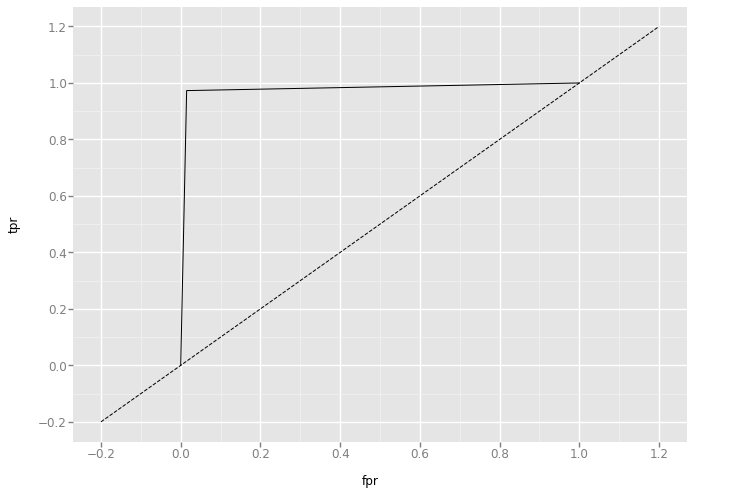

<ggplot: (165635217237)>

In [37]:
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_line() +\
 geom_abline(linetype='dashed')

The ROC curve plots the TPR on the y-axis and the FPR on the x-axis. The closer the model is to the top-left corner, the more accurate it is. Since this model lies slightly on the left of the diagonal, this is because the tpr is quite high (about 96%) while the fpr is not too low (about 83.33%).

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR). An ROC space is defined by FPR and TPR as x and y axes, respectively, which depicts relative trade-offs between true positive (benefits) and false positive (costs). 
The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing no false negatives and no false positives. The (0,1) point is also called a perfect classification. A random guess would give a point along a diagonal line from the left bottom to the top right corners.
As seen above, our ROC plot depicts that our model is pretty close to the (0,1) point and so our classifier is pretty accurate. On digging furter, we see our false positive rate was a mere 1% and our true positive rate was a high 97%.


## Precision-Recall curve

In [42]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.95


Text(0.5,1,'2-class Precision-Recall curve: AP=0.95')

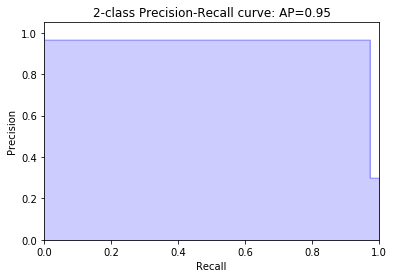

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, predictions)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

As we know, precision is the fraction of retrieved instances that are relevant, while recall is the fraction of retrieved instances to all relevant instances. The ideal point here would be the top right corner which would represent a precision of 1 and a recall of 1 as well. In the above precision recall curve, we can see that the precision value for a given recall value is pretty constant until recall value hits 0.95 when the precision drops to 0.3. 